# Model Training

### 1.1 Import Data and Required Packages

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import   ColumnTransformer
import warnings

In [38]:
df= pd.read_csv('data/exams.csv')

In [39]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


### Preparing X and Y variables

In [40]:
X = df.drop(columns=['math score'])

In [41]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group D,some college,standard,completed,70,78
1,male,group D,associate's degree,standard,none,93,87
2,female,group D,some college,free/reduced,none,76,77
3,male,group B,some college,free/reduced,none,70,63
4,female,group D,associate's degree,standard,none,85,86


In [42]:
y = df['math score']

In [43]:
y

0      59
1      96
2      57
3      70
4      83
       ..
995    77
996    80
997    67
998    80
999    58
Name: math score, Length: 1000, dtype: int64

In [44]:
print("Categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:  ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:  ",end=" ")
print(df['test preparation course'].unique())


Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group D' 'group B' 'group C' 'group E' 'group A']
Categories in 'parental level of education' variable:   ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['completed' 'none']


In [45]:
#Create columns with Transformer 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features= X.select_dtypes(include="object").columns



numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)


In [46]:
X = preprocessor.fit_transform(X)

In [47]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.02709151,  0.58994292],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         1.60407283,  1.18920774],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.39842962,  0.52335794],
       ...,
       [ 1.        ,  0.        ,  1.        , ...,  0.        ,
         1.10763151,  1.12262276],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         0.11474887, -0.47541676],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -1.65825585, -1.60736142]])

In [48]:
# separate dataset into train and test
from sklearn.model_selection  import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create an Evaluate Functions to give all metrics after model Training

In [49]:
from sklearn.metrics import mean_absolute_error


def evaluate_model(true, predicted):
    mae= mean_absolute_error(true,predicted)
    mse= mean_squared_error(true, predicted)
    rmse= np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae,rmse,r2_square
    

In [50]:
models ={
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regression": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred= model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for Training set')
    print("- Root Mean Square Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_r2))
    print("- R2 Score: {:4f}".format(model_train_r2))

    print('--------------------------------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Square Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_r2))
    print("- R2 Score: {:4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

LinearRegression
Model Performance for Training set
- Root Mean Square Error: 5.4724
- Mean Absolute Error: 0.8723
- R2 Score: 0.872308
--------------------------------------------------------
Model performance for Test set
- Root Mean Square Error: 4.9804
- Mean Absolute Error: 0.8876
- R2 Score: 0.887642


Lasso
Model Performance for Training set
- Root Mean Square Error: 6.7208
- Mean Absolute Error: 0.8074
- R2 Score: 0.807400
--------------------------------------------------------
Model performance for Test set
- Root Mean Square Error: 6.8090
- Mean Absolute Error: 0.7900
- R2 Score: 0.789992


Ridge
Model Performance for Training set
- Root Mean Square Error: 5.4721
- Mean Absolute Error: 0.8723
- R2 Score: 0.872320
--------------------------------------------------------
Model performance for Test set
- Root Mean Square Error: 4.9874
- Mean Absolute Error: 0.8873
- R2 Score: 0.887328


K-Neighbors Regression
Model Performance for Training set
- Root Mean Square Error: 5.7228
-

In [51]:
pd.DataFrame(list(zip(model_list, r2_list)),columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,LinearRegression,0.887642
2,Ridge,0.887328
7,CatBoost Regressor,0.874470
5,Random Forest Regressor,0.853989
6,XGBRegressor,0.838367
8,AdaBoost Regressor,0.831026
3,K-Neighbors Regression,0.810209
1,Lasso,0.789992
4,Decision Tree,0.743504


## Linear Regression 

In [52]:
lin_model = LinearRegression(fit_intercept=True)
lin_model= lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score= r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.76


Text(0, 0.5, 'Predict')

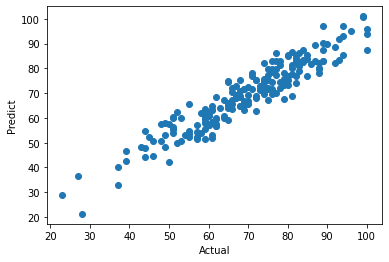

In [53]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predict')

<AxesSubplot:xlabel='math score'>

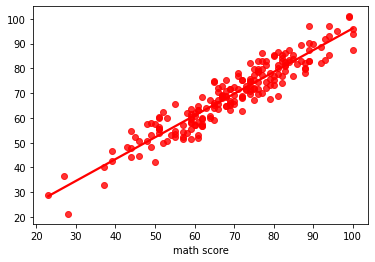

In [54]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

In [55]:
pred_df= pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,67,68.144531,-1.144531
737,78,81.378906,-3.378906
740,39,42.675781,-3.675781
660,70,69.328125,0.671875
411,90,89.671875,0.328125
...,...,...,...
408,100,87.542969,12.457031
332,66,70.578125,-4.578125
208,66,63.492188,2.507812
613,68,64.730469,3.269531
